In [4]:
!pip install iexfinance

In [51]:
from iexfinance.refdata import get_symbols
import configparser
import os

config = configparser.ConfigParser()

try:
    config.read(os.path.relpath("config.ini"))
except FileExistsError as e:
    print("FileExistsError: {}".format(e))
    sys.exit(1)

IEX_TOKEN = config["iex_cloud"]["IEX_TOKEN"]
base_url = config["iex_cloud"]["base_url"]
os.environ["IEX_TOKEN"] = IEX_TOKEN

# Account

In [133]:
from iexfinance.account import get_usage

get_usage()

{'dailyUsage': {'20191126': '50527', '20191127': '62144'},
 'monthlyUsage': 112671,
 'monthlyPayAsYouGo': 0,
 'tokenUsage': {},
 'keyUsage': {'REF_DATA': '300',
  'STOCK_QUOTE': '55',
  'HISTORICAL_PRICES': '50980',
  'HISTORICAL_CLOSE_PRICES': '4',
  'IEX_DEEP': '0',
  'STOCK_BOOK': '0',
  'COMPANY': '13',
  'DIVIDENDS': '50',
  'EARNINGS': '4000',
  'ESTIMATES': '10000',
  'FINANCIALS': '5000',
  'MUTUAL_FUND_HOLDERS': '10000',
  'INCOME': '1000',
  'INSIDERS': '5000',
  'INSIDER_SUMMARY': '5000',
  'INSIDER_TRANSACTIONS': '5550',
  'INST_HOLDERS': '10000',
  'BALANCE_SHEET': '3000',
  'CASH_FLOW': '1000',
  'KEY_STATS': '85',
  'COMPANY_LOGO': '1',
  'CORE_NEWS': '10',
  'STOCK_PEERS': '1000',
  'PREVIOUS': '2',
  'PRICE_ONLY': '1',
  'PRICE_TARGET': '500',
  'SPLITS': '0',
  'VOLUME_BY_VENUE': '20',
  'STOCKTWITS_SENTIMENT': '100'}}

In [138]:
from iexfinance.account import get_metadata

get_metadata()

{'payAsYouGoEnabled': False,
 'effectiveDate': 1574868263000,
 'subscriptionTermType': 'annual',
 'tierName': 'launch',
 'messageLimit': 5000000,
 'messagesUsed': 112671,
 'circuitBreaker': 0}

In [136]:
# Pay as you go
# iexfinance provides two methods, allow_pay_as_you_go and disallow_pay_as_you_go 
# to toggle Pay-as-you-go for a given account.
from iexfinance.account import allow_pay_as_you_go, disallow_pay_as_you_go

# allow_pay_as_you_go()
# disallow_pay_as_you_go()

# Stock class

In [131]:
get_symbols(output_format='pandas')

,symbol,exchange,name,date,type,iexId,region,currency,isEnabled
0,A,NYS,Agilent Technologies Inc.,2019-11-27,cs,IEX_46574843354B2D52,US,USD,True
1,AA,NYS,Alcoa Corp.,2019-11-27,cs,IEX_4238333734532D52,US,USD,True
2,AAAU,PSE,Perth Mint Physical Gold ETF,2019-11-27,et,IEX_474B433136332D52,US,USD,True
3,AACG,NAS,ATA Creativity Global Sponsored ADR,2019-11-27,ad,IEX_44595A4C53392D52,US,USD,True
4,AADR,PSE,AdvisorShares Dorsey Wright ADR ETF,2019-11-27,et,IEX_5253355435362D52,US,USD,True
...,...,...,...,...,...,...,...,...,...
8851,ZUO,NYS,Zuora Inc. Class A,2019-11-27,cs,IEX_4D474631525A2D52,US,USD,True
8852,ZVO,NAS,Zovio Inc.,2019-11-27,cs,IEX_514A435352362D52,US,USD,True
8853,ZYME,NYS,Zymeworks Inc.,2019-11-27,cs,IEX_5253315838322D52,US,USD,True
8854,ZYNE,NAS,Zynerba Pharmaceuticals Inc,2019-11-27,cs,IEX_4E3154424A382D52,US,USD,True


In [59]:
from iexfinance.stocks import Stock

aapl = Stock("AAPL")
"""Quote
Reference: https://iexcloud.io/docs/api/#quote
Data Weighting: ``1`` per quote
Parameters
----------
displayPercent: bool, defaults to false, optional
    If set to true, all percentage values will be
    multiplied by a factor of 100.
Returns
-------
dict or pandas.DataFrame
    Stocks Quote endpoint data
"""
aapl.get_quote()

{'symbol': 'AAPL',
 'companyName': 'Apple, Inc.',
 'primaryExchange': 'NASDAQ',
 'calculationPrice': 'tops',
 'open': None,
 'openTime': None,
 'close': None,
 'closeTime': None,
 'high': None,
 'low': None,
 'latestPrice': 265.925,
 'latestSource': 'IEX real time price',
 'latestTime': '9:48:15 AM',
 'latestUpdate': 1574866095619,
 'latestVolume': None,
 'iexRealtimePrice': 265.925,
 'iexRealtimeSize': 1500,
 'iexLastUpdated': 1574866095619,
 'delayedPrice': None,
 'delayedPriceTime': None,
 'extendedPrice': None,
 'extendedChange': None,
 'extendedChangePercent': None,
 'extendedPriceTime': None,
 'previousClose': 264.29,
 'previousVolume': 26334882,
 'change': 1.635,
 'changePercent': 0.00619,
 'volume': None,
 'iexMarketPercent': 0.03625893158661277,
 'iexVolume': 73119,
 'avgTotalVolume': 23628742,
 'iexBidPrice': 240,
 'iexBidSize': 100,
 'iexAskPrice': 269,
 'iexAskSize': 100,
 'marketCap': 1181576574750,
 'peRatio': 22.28,
 'week52High': 268,
 'week52Low': 142,
 'ytdChange': 0.

In [106]:
"""Balance Sheet
Pulls balance sheet data. Available quarterly (4 quarters) and annually
(4 years)
Reference: https://iexcloud.io/docs/api/#balance-sheet
Data Weighting: ``3000`` per symbol per period
.. warning:: This endpoint is only available using IEX Cloud. See
             :ref:`Migrating` for more information.
Parameters
----------
period: str, default 'quarter', optional
    Allows you to specify annual or quarterly balance sheet.
    Value should be `annual` or `quarter`.
"""
aapl.get_balance_sheet()

{'symbol': 'AAPL',
 'balancesheet': [{'reportDate': '2019-09-30',
   'currentCash': 28124000000,
   'shortTermInvestments': 72456000000,
   'receivables': 22926000000,
   'inventory': 4106000000,
   'otherCurrentAssets': 12329000000,
   'currentAssets': 162819000000,
   'longTermInvestments': 106698000000,
   'propertyPlantEquipment': 37378000000,
   'goodwill': 0,
   'intangibleAssets': None,
   'otherAssets': 31621000000,
   'totalAssets': 338516000000,
   'accountsPayable': 46236000000,
   'currentLongTermDebt': 10260000000,
   'otherCurrentLiabilities': 43242000000,
   'totalCurrentLiabilities': 105718000000,
   'longTermDebt': 91807000000,
   'otherLiabilities': 4039000000,
   'minorityInterest': 0,
   'totalLiabilities': 248028000000,
   'commonStock': 4443236000,
   'retainedEarnings': 45898000000,
   'treasuryStock': None,
   'capitalSurplus': None,
   'shareholderEquity': 90488000000,
   'netTangibleAssets': 90488000000}]}

In [61]:
"""Book
Reference: https://iexcloud.io/docs/api/#book
Data Weighting: ``1`` per quote returned
Returns
-------
dict or pandas.DataFrame
    Stocks Book endpoint data
"""
aapl.get_book()

{'quote': {'symbol': 'AAPL',
  'companyName': 'Apple, Inc.',
  'primaryExchange': 'NASDAQ',
  'calculationPrice': 'tops',
  'open': None,
  'openTime': None,
  'close': None,
  'closeTime': None,
  'high': None,
  'low': None,
  'latestPrice': 266.07,
  'latestSource': 'IEX real time price',
  'latestTime': '9:49:12 AM',
  'latestUpdate': 1574866152479,
  'latestVolume': None,
  'iexRealtimePrice': 266.07,
  'iexRealtimeSize': 100,
  'iexLastUpdated': 1574866152479,
  'delayedPrice': None,
  'delayedPriceTime': None,
  'extendedPrice': None,
  'extendedChange': None,
  'extendedChangePercent': None,
  'extendedPriceTime': None,
  'previousClose': 264.29,
  'previousVolume': 26334882,
  'change': 1.78,
  'changePercent': 0.00674,
  'volume': None,
  'iexMarketPercent': 0.03766357633178337,
  'iexVolume': 78504,
  'avgTotalVolume': 23628742,
  'iexBidPrice': 240,
  'iexBidSize': 100,
  'iexAskPrice': 269,
  'iexAskSize': 100,
  'marketCap': 1182220848900,
  'peRatio': 22.29,
  'week52Hig

In [107]:
"""Cash Flow
Pulls cash flow data. Available quarterly (4 quarters) or annually
(4 years).
Reference: https://iexcloud.io/docs/api/#cash-flow
Data Weighting: ``1000`` per symbol per period
.. warning:: This endpoint is only available using IEX Cloud. See
         :ref:`Migrating` for more information.
Parameters
----------
period: str, default 'quarterly', optional
    Allows you to specify annual or quarterly cash flows. Defaults to
    quarterly. Values should be annual or quarter.
Returns
------
dict or pandas.DataFrame
    Stocks Cash Flow endpoint data
"""
aapl.get_cash_flow()

{'symbol': 'AAPL',
 'cashflow': [{'reportDate': '2019-09-30',
   'netIncome': 13686000000,
   'depreciation': 3179000000,
   'changesInReceivables': -8778000000,
   'changesInInventories': -785000000,
   'cashChange': -1927000000,
   'cashFlow': 19910000000,
   'capitalExpenditures': -2777000000,
   'investments': 2802000000,
   'investingActivityOther': -810000000,
   'totalInvestingCashFlows': -798000000,
   'dividendsPaid': -3479000000,
   'netBorrowings': -293000000,
   'otherFinancingCashFlows': -213000000,
   'cashFlowFinancing': -21039000000,
   'exchangeRateEffect': None}]}

In [65]:
"""Company
Reference: https://iexcloud.io/docs/api/#company
Data Weighting: ``1``
Returns
-------
dict or pandas.DataFrame
    Stocks Company endpoint data
"""
aapl.get_company()

{'symbol': 'AAPL',
 'companyName': 'Apple, Inc.',
 'exchange': 'NASDAQ',
 'industry': 'Telecommunications Equipment',
 'website': 'http://www.apple.com',
 'description': 'Apple, Inc. engages in the design, manufacture, and sale of smartphones, personal computers, tablets, wearables and accessories, and other variety of related services. It operates through the following geographical segments: Americas, Europe, Greater China, Japan, and Rest of Asia Pacific. The Americas segment includes North and South America. The Europe segment consists of European countries, as well as India, the Middle East, and Africa. The Greater China segment comprises of China, Hong Kong, and Taiwan. The Rest of Asia Pacific segment includes Australia and Asian countries. Its products and services include iPhone, Mac, iPad, AirPods, Apple TV, Apple Watch, Beats products, Apple Care, iCloud, digital content stores, streaming, and licensing services. The company was founded by Steven Paul Jobs, Ronald Gerald Wayn

In [97]:
"""Delayed Quote
Reference: https://iexcloud.io/docs/api/#delayed-quote
Data Weighting: ``1`` per symbol per quote
Returns
-------
dict or pandas.DataFrame
    Stocks Delayed Quote endpoint data
"""
aapl.get_delayed_quote()

{}

In [90]:
"""Dividends
Reference: https://iexcloud.io/docs/api/#dividends
Data Weighting: ``10`` per symbol per period returned
Parameters
----------
range: str, default '1m', optional
    Time period of dividends to return
    Choose from [`5y`,`2y`,`1y`,`ytd`,`6m`,`3m`,`1m`, `next`]
Returns
-------
list of dict or pandas.DataFrame
    Stocks Dividends endpoint data
"""
aapl.get_dividends(range='ytd')

[{'exDate': '2019-02-08',
  'paymentDate': '2019-02-14',
  'recordDate': '2019-02-11',
  'declaredDate': '2019-01-29',
  'amount': '0.73',
  'flag': 'Cash',
  'currency': 'USD',
  'description': 'Ordinary Shares',
  'frequency': 'quarterly',
  'date': '2019-11-27'}]

In [75]:
"""Earnings
Earnings data for a given company including the actual EPS, consensus,
and fiscal period. Earnings are available quarterly (last 4 quarters)
and annually (last 4 years).
Reference: https://iexcloud.io/docs/api/#earnings
Data Weighting: ``1000`` per symbol per period
Parameters
----------
last: int, default 1, optional
    Number of quarters or years to return.
Returns
-------
list or pandas.DataFrame
    Stocks Earnings endpoint data
"""
aapl.get_earnings(last=3)

[{'actualEPS': 3.03,
  'consensusEPS': 2.83,
  'announceTime': 'AMC',
  'numberOfEstimates': 39,
  'EPSSurpriseDollar': 0.2,
  'EPSReportDate': '2019-10-30',
  'fiscalPeriod': 'Q3 2019',
  'fiscalEndDate': '2019-09-30',
  'yearAgo': 2.91,
  'yearAgoChangePercent': 0.0412}]

In [98]:
"""Estimates
Provides the latest consensus estimate for the next fiscal period
Reference: https://iexcloud.io/docs/api/#estimates
Data Weighting: ``10000`` per symbol per period
.. warning:: This endpoint is only available using IEX Cloud. See
         :ref:`Migrating` for more information.
Returns
-------
dict or pandas.DataFrame
"""
aapl.get_estimates()

{'symbol': 'AAPL',
 'estimates': [{'consensusEPS': 4.51,
   'announceTime': 'AMC',
   'numberOfEstimates': 39,
   'reportDate': '2020-02-04',
   'fiscalPeriod': 'Q4 2019',
   'fiscalEndDate': '2019-12-31'}]}

In [99]:
"""Financials
Pulls income statement, balance sheet, and cash flow data from the
most recent reported quarter.
Reference: https://iexcloud.io/docs/api/#financials
Data Weighting: ``5000`` per symbol per period
Parameters
----------
period: str, default 'quarter', choose between 'annual' and 'quarter'
Returns
-------
list or pandas.DataFrame
    Stocks Financials endpoint data
"""
aapl.get_financials()

[{'reportDate': '2019-09-30',
  'grossProfit': 24165000000,
  'costOfRevenue': 39771000000,
  'operatingRevenue': 63936000000,
  'totalRevenue': 63936000000,
  'operatingIncome': 15477000000,
  'netIncome': 13686000000,
  'researchAndDevelopment': 4110000000,
  'operatingExpense': 48459000000,
  'currentAssets': 162819000000,
  'totalAssets': 338516000000,
  'totalLiabilities': 248028000000,
  'currentCash': 28124000000,
  'currentDebt': 16240000000,
  'shortTermDebt': 16240000000,
  'longTermDebt': 91807000000,
  'totalCash': 100580000000,
  'totalDebt': 108047000000,
  'shareholderEquity': 90488000000,
  'cashChange': -1927000000,
  'cashFlow': 19910000000}]

In [100]:
"""Fund Ownership
Returns the top 10 fund holders, meaning any firm not defined as
buy-side or sell-side such as mutual funds, pension funds, endowments,
investment firms, and other large entities that manage funds on behalf
of others.
Reference: https://iexcloud.io/docs/api/#fund-ownership
Data Weighting: ``10000`` per symbol per period
Returns
-------
list or pandas.DataFrame
    Stocks Fund Ownership endpoint data
"""
aapl.get_fund_ownership()

[{'report_date': 1572480000000,
  'entityProperName': 'Vanguard Total Stock Market Index Fund',
  'adjHolding': 114273195,
  'adjMv': 28426599988,
  'reportedHolding': 114273195,
  'reportedMv': 28426599988},
 {'report_date': 1572480000000,
  'entityProperName': 'Vanguard 500 Index Fund',
  'adjHolding': 84143343,
  'adjMv': 20931498005,
  'reportedHolding': 84143343,
  'reportedMv': 20931498005},
 {'report_date': 1572480000000,
  'entityProperName': 'Spdr S&p 500 Etf',
  'adjHolding': 46322425,
  'adjMv': 11523166443,
  'reportedHolding': 46322425,
  'reportedMv': 11523166443},
 {'report_date': 1546214400000,
  'entityProperName': 'Government Pension Fund - Global (the)',
  'adjHolding': 45933028,
  'adjMv': 7245475837,
  'reportedHolding': 45933028,
  'reportedMv': 7245475993},
 {'report_date': 1569801600000,
  'entityProperName': 'Vanguard Institutional Index Fund',
  'adjHolding': 38977436,
  'adjMv': 8729776341,
  'reportedHolding': 38977436,
  'reportedMv': 8729776341},
 {'report

In [84]:
"""Historical Prices
Reference: https://iexcloud.io/docs/api/#chart
Data Weighting: See IEX Cloud Docs
Parameters
----------
range: str, default '1m', optional
    Chart range to return. See docs.
    Choose from [`5y`,`2y`,`1y`,`ytd`,`6m`,`3m`,`1m`,`1d`,`date`,
    `dynamic`]
    Choosing `date` will return  IEX-only data by minute for a
    specified date in the format YYYYMMDD if available.
    Currently supporting trailing 30 calendar days.
    Choosing `dynamic` will return `1d` or `1m` data depending on
    the day or week and time of day.
    Intraday per minute data is only returned during market hours.
chartReset: boolean, default True, optional
    If true, 1d chart will reset at midnight instead of the default
    behavior of 9:30am EST.
chartSimplify: boolean, default True, optional
    If true, runs polyline simplification using Douglas-Peucker
    algorithm. Useful for plotting spotline charts
chartInterval: int, default None, optional
    Chart data will return every nth element (where n is chartInterval)
changeFromClose: bool, default False, optional
    If true, changeOverTime and marketChangeOverTime will be relative
    to previous day close instead of the first value.
chartLast: int, optional
    return the last N elements
chartCloseOnly: boolean, default False, optional
    Specify to return adjusted data only with keys ``date``, ``close``,
    and ``volume``.
chartIEXOnly: boolean, default False, optional
    Only for ``1d``. Limits the return of intraday prices to IEX only
    data
Returns
-------
list or pandas DataFrame
    Stocks Historical Prices endpoint data
"""
aapl.get_historical_prices()

[{'date': '2019-10-28',
  'open': 247.42,
  'close': 249.05,
  'high': 249.25,
  'low': 246.72,
  'volume': 24143241,
  'uOpen': 247.42,
  'uClose': 249.05,
  'uHigh': 249.25,
  'uLow': 246.72,
  'uVolume': 24143241,
  'change': 0,
  'changePercent': 0,
  'label': 'Oct 28',
  'changeOverTime': 0},
 {'date': '2019-10-29',
  'open': 248.97,
  'close': 243.29,
  'high': 249.75,
  'low': 242.57,
  'volume': 35709867,
  'uOpen': 248.97,
  'uClose': 243.29,
  'uHigh': 249.75,
  'uLow': 242.57,
  'uVolume': 35709867,
  'change': -5.76,
  'changePercent': -2.3128,
  'label': 'Oct 29',
  'changeOverTime': -0.023128},
 {'date': '2019-10-30',
  'open': 244.76,
  'close': 243.26,
  'high': 245.3,
  'low': 241.21,
  'volume': 31130522,
  'uOpen': 244.76,
  'uClose': 243.26,
  'uHigh': 245.3,
  'uLow': 241.21,
  'uVolume': 31130522,
  'change': -0.03,
  'changePercent': -0.0123,
  'label': 'Oct 30',
  'changeOverTime': -0.023248},
 {'date': '2019-10-31',
  'open': 247.24,
  'close': 248.76,
  'high'

In [64]:
"""Chart
MOVED in IEX Cloud
.. seealso:: ``get_historical_prices``
"""
aapl.get_chart()

[{'date': '2019-10-28',
  'open': 247.42,
  'close': 249.05,
  'high': 249.25,
  'low': 246.72,
  'volume': 24143241,
  'uOpen': 247.42,
  'uClose': 249.05,
  'uHigh': 249.25,
  'uLow': 246.72,
  'uVolume': 24143241,
  'change': 0,
  'changePercent': 0,
  'label': 'Oct 28',
  'changeOverTime': 0},
 {'date': '2019-10-29',
  'open': 248.97,
  'close': 243.29,
  'high': 249.75,
  'low': 242.57,
  'volume': 35709867,
  'uOpen': 248.97,
  'uClose': 243.29,
  'uHigh': 249.75,
  'uLow': 242.57,
  'uVolume': 35709867,
  'change': -5.76,
  'changePercent': -2.3128,
  'label': 'Oct 29',
  'changeOverTime': -0.023128},
 {'date': '2019-10-30',
  'open': 244.76,
  'close': 243.26,
  'high': 245.3,
  'low': 241.21,
  'volume': 31130522,
  'uOpen': 244.76,
  'uClose': 243.26,
  'uHigh': 245.3,
  'uLow': 241.21,
  'uVolume': 31130522,
  'change': -0.03,
  'changePercent': -0.0123,
  'label': 'Oct 30',
  'changeOverTime': -0.023248},
 {'date': '2019-10-31',
  'open': 247.24,
  'close': 248.76,
  'high'

In [123]:
"""Time Series
MOVED in IEX Cloud
.. seealso:: ``get_historical_prices``
"""
aapl.get_time_series()

[{'date': '2019-10-28',
  'open': 247.42,
  'close': 249.05,
  'high': 249.25,
  'low': 246.72,
  'volume': 24143241,
  'uOpen': 247.42,
  'uClose': 249.05,
  'uHigh': 249.25,
  'uLow': 246.72,
  'uVolume': 24143241,
  'change': 0,
  'changePercent': 0,
  'label': 'Oct 28',
  'changeOverTime': 0},
 {'date': '2019-10-29',
  'open': 248.97,
  'close': 243.29,
  'high': 249.75,
  'low': 242.57,
  'volume': 35709867,
  'uOpen': 248.97,
  'uClose': 243.29,
  'uHigh': 249.75,
  'uLow': 242.57,
  'uVolume': 35709867,
  'change': -5.76,
  'changePercent': -2.3128,
  'label': 'Oct 29',
  'changeOverTime': -0.023128},
 {'date': '2019-10-30',
  'open': 244.76,
  'close': 243.26,
  'high': 245.3,
  'low': 241.21,
  'volume': 31130522,
  'uOpen': 244.76,
  'uClose': 243.26,
  'uHigh': 245.3,
  'uLow': 241.21,
  'uVolume': 31130522,
  'change': -0.03,
  'changePercent': -0.0123,
  'label': 'Oct 30',
  'changeOverTime': -0.023248},
 {'date': '2019-10-31',
  'open': 247.24,
  'close': 248.76,
  'high'

In [101]:
"""Income Statement
Pulls income statement data. Available quarterly (4 quarters) or
annually (4 years).
Reference: https://iexcloud.io/docs/api/#income-statement
Data Weighting: ``1000`` per symbol per period
.. warning:: This endpoint is only available using IEX Cloud. See
         :ref:`Migrating` for more information.
Parameters
----------
period: str, default 'quarterly', optional
     Allows you to specify annual or quarterly income statement.
     Defaults to quarterly. Values should be annual or quarter
Returns
-------
list or pandas.DataFrame
    Stocks Income Statement endpoint data
"""
aapl.get_income_statement()

[{'reportDate': '2019-09-30',
  'totalRevenue': 63936000000,
  'costOfRevenue': 39771000000,
  'grossProfit': 24165000000,
  'researchAndDevelopment': 4110000000,
  'sellingGeneralAndAdmin': 4578000000,
  'operatingExpense': 48459000000,
  'operatingIncome': 15477000000,
  'otherIncomeExpenseNet': 650000000,
  'ebit': 15477000000,
  'interestIncome': 810000000,
  'pretaxIncome': 16127000000,
  'incomeTax': 2441000000,
  'minorityInterest': 0,
  'netIncome': 13686000000,
  'netIncomeBasic': 13686000000}]

In [102]:
"""Insider Roster
Returns the top 10 insiders, with the most recent information.
Reference: https://iexcloud.io/docs/api/#insider-roster
Data Weighting: ``5000`` per symbol
Returns
-------
list or pandas.DataFrame
    Stocks Insider Roster Endpoint data
"""
aapl.get_insider_roster()

[{'position': 3235000,
  'reportDate': 1569801600000,
  'entityName': 'WELLCOME TRUST LTD /DIRECT INVESTMENTS/'},
 {'position': 1147283,
  'reportDate': 1572912000000,
  'entityName': 'Arthur D. Levinson'},
 {'position': 854849,
  'reportDate': 1566777600000,
  'entityName': 'Timothy Donald Cook'},
 {'position': 267788,
  'reportDate': 1569801600000,
  'entityName': 'NOVO VENTURES US INC'},
 {'position': 151102,
  'reportDate': 1571184000000,
  'entityName': "Deirdre O'Brien"},
 {'position': 122195,
  'reportDate': 1569974400000,
  'entityName': 'Jeffrey E. Williams'},
 {'position': 80696,
  'reportDate': 1551398400000,
  'entityName': 'Albert Arnold Gore'},
 {'position': 65120,
  'reportDate': 1569801600000,
  'entityName': 'SEPIO CAPITAL LLC'},
 {'position': 50848,
  'reportDate': 1546387200000,
  'entityName': 'Angela J. Ahrendts'},
 {'position': 50571,
  'reportDate': 1551398400000,
  'entityName': 'Robert A. Iger'}]

In [103]:
"""Insider Summary
Returns aggregated insiders summary data for the last 6 months.
Reference: https://iexcloud.io/docs/api/#insider-summary
Data Weighting: ``5000`` per symbol
Returns
-------
list or pandas.DataFrame
    Stocks Insider Summary Endpoint data
"""
aapl.get_insider_summary()

[{'reportedTitle': 'Director',
  'netTransacted': -1177,
  'totalBought': 0,
  'totalSold': -1177,
  'fullName': 'James A. Bell'},
 {'reportedTitle': 'Principal Accounting Officer',
  'netTransacted': -2488,
  'totalBought': 16055,
  'totalSold': -18543,
  'fullName': 'Chris Kondo'},
 {'reportedTitle': 'COO',
  'netTransacted': -37908,
  'totalBought': 220708,
  'totalSold': -258616,
  'fullName': 'Jeffrey E. Williams'},
 {'reportedTitle': 'Director',
  'netTransacted': -54894,
  'totalBought': 54894,
  'totalSold': -109788,
  'fullName': 'Arthur D. Levinson'},
 {'reportedTitle': 'Chief Executive Officer; Director',
  'netTransacted': -583700,
  'totalBought': 560000,
  'totalSold': -1143700,
  'fullName': 'Timothy Donald Cook'},
 {'reportedTitle': 'SVP, GC and Secretary',
  'netTransacted': 84029,
  'totalBought': 105770,
  'totalSold': -21741,
  'fullName': 'Katherine L. Adams'},
 {'reportedTitle': 'Senior Vice President, CFO',
  'netTransacted': -37908,
  'totalBought': 220708,
  't

In [104]:
"""Insider Transactions
Returns insider transactions.
Reference: https://iexcloud.io/docs/api/#insider-transactions
Data Weighting: ``50`` per transaction
Returns
-------
list or pandas.DataFrame
    Stocks Insider Transactions Endpoint data
"""
aapl.get_insider_transactions()

[{'fullName': 'Katherine L. Adams',
  'reportedTitle': 'SVP, GC and Secretary',
  'effectiveDate': 1573603200000,
  'tranShares': -14370,
  'tranPrice': None,
  'tranValue': None,
  'directIndirect': 'D',
  'tranCode': 'M'},
 {'fullName': 'Katherine L. Adams',
  'reportedTitle': 'SVP, GC and Secretary',
  'effectiveDate': 1573603200000,
  'tranShares': -7371,
  'tranPrice': 264.47,
  'tranValue': -1949408.37,
  'directIndirect': 'D',
  'tranCode': 'F'},
 {'fullName': 'Katherine L. Adams',
  'reportedTitle': 'SVP, GC and Secretary',
  'effectiveDate': 1573603200000,
  'tranShares': 14370,
  'tranPrice': 0,
  'tranValue': 0,
  'directIndirect': 'D',
  'tranCode': 'M'},
 {'fullName': 'Arthur D. Levinson',
  'reportedTitle': 'Director',
  'effectiveDate': 1572912000000,
  'tranShares': -37394,
  'tranPrice': None,
  'tranValue': None,
  'directIndirect': 'D',
  'tranCode': 'M'},
 {'fullName': 'Arthur D. Levinson',
  'reportedTitle': 'Director',
  'effectiveDate': 1572912000000,
  'tranShar

In [105]:
"""Institutional Ownership
Returns the top 10 institutional holders, defined as buy-side or
sell-side firms.
Reference: https://iexcloud.io/docs/api/#institutional-ownership
Data Weighting: ``10000`` per symbol per period
Returns
-------
list or pandas.DataFrame
    Stocks Institutional Ownership endpoint data
"""
aapl.get_institutional_ownership()

[{'reportDate': 1569801600000,
  'adjHolding': 324745454,
  'reportedHolding': 324745454,
  'adjMv': 72733239332,
  'entityProperName': 'Vanguard Group, Inc. (Subfiler)'},
 {'reportDate': 1569801600000,
  'adjHolding': 248838679,
  'reportedHolding': 248838679,
  'adjMv': 55732398936,
  'entityProperName': 'Berkshire Hathaway, Inc.'},
 {'reportDate': 1569801600000,
  'adjHolding': 184232445,
  'reportedHolding': 184232445,
  'adjMv': 41262540707,
  'entityProperName': 'State Street Corp.'},
 {'reportDate': 1569801600000,
  'adjHolding': 107143969,
  'reportedHolding': 107143969,
  'adjMv': 23997034737,
  'entityProperName': 'BlackRock Institutional Trust Co. NA'},
 {'reportDate': 1569801600000,
  'adjHolding': 89686121,
  'reportedHolding': 89686121,
  'adjMv': 20087000520,
  'entityProperName': 'Fidelity Management & Research Co.'},
 {'reportDate': 1569801600000,
  'adjHolding': 84178386,
  'reportedHolding': 84178386,
  'adjMv': 18853433112,
  'entityProperName': 'BlackRock Fund Advi

In [108]:
"""
Reference: https://iexcloud.io/docs/api/#key-stats
Parameters
----------
stat: str, optional
    Case sensitive string matching the name of a single key
    to return one value.Ex: If you only want the next earnings
    date, you would use `nextEarningsDate`.
Returns
-------
dict or pandas.DataFrame
    Stocks Key Stats endpoint data
"""
aapl.get_key_stats()

{'week52change': 0.5254270000000001,
 'week52high': 268,
 'week52low': 142,
 'marketcap': 1183553829900,
 'employees': 137000,
 'day200MovingAvg': 207.2,
 'day50MovingAvg': 241.3,
 'float': 4436676187.320001,
 'avg10Volume': 23024401.2,
 'avg30Volume': 23518928.53,
 'ttmEPS': 11.9342,
 'ttmDividendRate': 3,
 'companyName': 'Apple, Inc.',
 'sharesOutstanding': 4443270000,
 'maxChangePercent': 260.6733,
 'year5ChangePercent': 1.2209,
 'year2ChangePercent': 0.5181,
 'year1ChangePercent': 0.516816,
 'ytdChangePercent': 0.673569,
 'month6ChangePercent': 0.482859,
 'month3ChangePercent': 0.294524,
 'month1ChangePercent': 0.061193,
 'day30ChangePercent': 0.127661,
 'day5ChangePercent': 0.004179,
 'nextDividendDate': None,
 'dividendYield': 0.011351167278368457,
 'nextEarningsDate': '2020-02-04',
 'exDividendDate': '2019-11-07',
 'peRatio': 22.28,
 'beta': 1.4912271623097162}

In [110]:
"""
Reference: https://iexcloud.io/docs/api/#largest-trades
Returns
-------
list or pandas.DataFrame
    Stocks Largest Trades endpoint data
"""
aapl.get_largest_trades()

[]

In [111]:
"""
Reference: https://iexcloud.io/docs/api/#logo
Returns
-------
dict or pandas.DataFrame
    Stocks Logo endpoint data
"""
aapl.get_logo()

{'url': 'https://storage.googleapis.com/iexcloud-hl37opg/api/logos/AAPL.png'}

In [112]:
"""News
Reference: https://iexcloud.io/docs/api/#news
Data Weighting: ``10`` per symbol per news item returned
Parameters
----------
last: int, default 10, optional
    Number of news listings to return.
Returns
-------
list or dict
    Stocks News endpoint data
"""
aapl.get_news()

[{'datetime': 1574869033000,
  'headline': 'Downtown Toronto is About to Get a New Apple Store',
  'source': 'Mac Rumors',
  'url': 'https://cloud.iexapis.com/v1/news/article/c5767dc9-571e-4288-a081-27bd0fcfb15e',
  'summary': "The construction barriers covering an all-new Apple Store are nearly ready to come down at North America's busiest shopping mall. Apple is set to open an over 10,000-square-foot store at the Eaton Centre in Toronto, Canada as early as December, according to a source, who said the grand opening will likely occur within the first half of the month. Apple's existing store at the Eaton Centre Unlike other Apple Stores , Today at Apple sessions at the existing Apple Eaton Centre location abruptly end after Friday, December 6 , suggesting that the new store could open on Saturday, December 7. However, our source believes that employee training could push back the opening until Saturday, December 14. MacRumors was first to report on Apple's plans for a new store at the

In [113]:
"""OHLC
Returns the official open and close for a give symbol.
Reference:  https://iexcloud.io/docs/api/#ohlc
Data Weighting: ``2`` per symbol
Returns
-------
dict or pandas.DataFrame
    Stocks OHLC endpoint data
"""
aapl.get_ohlc()

{}

In [114]:
"""Open/Close Price
Reference: https://iexcloud.io/docs/api/#open-close-price
Data Weighting: ``2`` per symbol
Notes
-----
Open/Close Price is an alias for the OHLC endpoint, and will return the
same
Returns
-------
list or pandas.DataFrame
    Stocks Open/Close (OHLC) endpoint data
"""
aapl.get_open_close()

{}

In [115]:
"""Peers
Reference:https://iexcloud.io/docs/api/#peers
Data Weighting: ``500`` per call
Notes
-----
Only allows JSON format (pandas not supported).
Returns
-------
list
    Stocks Peers endpoint data
"""
aapl.get_peers()

['GOOGL', 'BB', 'HPQ', 'IBM', 'NOK', 'MSFT']

In [116]:
"""Previous Day Prices
This returns previous day adjusted price data for one or more stocks
Reference: https://iexcloud.io/docs/api/#previous
Data Weighting: ``2`` per symbol
Returns
-------
dict or pandas.DataFrame
    Stocks Previous Day Prices endpoint data
"""
aapl.get_previous_day_prices()

{'date': '2019-11-26',
 'open': 266.94,
 'close': 264.29,
 'high': 267.16,
 'low': 262.5,
 'volume': 26334882,
 'uOpen': 266.94,
 'uClose': 264.29,
 'uHigh': 267.16,
 'uLow': 262.5,
 'uVolume': 26334882,
 'change': -2.08,
 'changePercent': -0.7809,
 'changeOverTime': 0,
 'symbol': 'AAPL'}

In [117]:
"""Price
Reference: https://iexcloud.io/docs/api/#price
``1`` per symbol
Returns
-------
float or pandas.DataFrame
    Stocks Price endpoint data
"""
aapl.get_price()

266.17

In [118]:
"""Price Target
Provides the latest avg, high, and low analyst price target for a
symbol.
Reference: https://iexcloud.io/docs/api/#price-target
Data Weighting: ``500`` per symbol
.. warning:: This endpoint is only available using IEX Cloud. See
         :ref:`Migrating` for more information.
Returns
-------
dict or pandas.DataFrame
    Latest average, high, and low price targets for a symbol
"""
aapl.get_price_target()

{'symbol': 'AAPL',
 'updatedDate': '2019-11-23',
 'priceTargetAverage': 254.35,
 'priceTargetHigh': 325,
 'priceTargetLow': 150,
 'numberOfAnalysts': 40}

In [119]:
"""Relevant Stocks
Similar to the peers endpoint, except this will return most active
market symbols when peers are not available. If the symbols
returned are not peers, the peers key will be false.
This is not intended to represent a definitive or accurate
list of peers, and is subject to change at any time.
Reference: https://iexcloud.io/docs/api/#relevant-stocks
Data Weighting: ``500`` per call
Returns
-------
dict or pandas.DataFrame
    Stocks Relevant Stocks endpoint data
"""
aapl.get_relevant_stocks()

{'peers': True, 'symbols': ['GOOGL', 'BB', 'HPQ', 'IBM', 'NOK', 'MSFT']}

In [122]:
"""Splits
Reference: https://iexcloud.io/docs/api/#splits
Parameters
----------
range: str, default '1m', optional
    Time period of splits to return.
    Choose from [`5y`,`2y`,`1y`,`ytd`,`6m`,`3m`,`1m`, `next`].
Returns
-------
list
    Stocks Splits endpoint data
"""
aapl.get_splits(range='5y')

[]

In [124]:
"""Volume by Venue
Reference:  https://iexcloud.io/docs/api/#volume-by-venue
Data Weighting: ``20`` per call
Returns
-------
list or pandas.DataFrame
    Stocks Volume by Venue endpoint data
"""
aapl.get_volume_by_venue()

[{'volume': 4133,
  'venue': 'XCIS',
  'venueName': 'NYSE National',
  'date': '2019-11-27',
  'marketPercent': 0.0009240893985503892,
  'avgMarketPercent': 0.0015407628669143858},
 {'volume': 10133,
  'venue': 'XASE',
  'venueName': 'NYSE American',
  'date': '2019-11-27',
  'marketPercent': 0.0021600297923382787,
  'avgMarketPercent': 0.0006748191762744565},
 {'volume': 19877,
  'venue': 'XPHL',
  'venueName': 'Nasdaq PSX',
  'date': '2019-11-27',
  'marketPercent': 0.004228714368289387,
  'avgMarketPercent': 0.0027189094419221033},
 {'volume': 30690,
  'venue': 'XCHI',
  'venueName': 'CHX',
  'date': '2019-11-27',
  'marketPercent': 0.006818455998519446,
  'avgMarketPercent': 0.026058346354998735},
 {'volume': 41460,
  'venue': 'XBOS',
  'venueName': 'Nasdaq BX',
  'date': '2019-11-27',
  'marketPercent': 0.008753735011392946,
  'avgMarketPercent': 0.0049275481985652046},
 {'volume': 61652,
  'venue': 'BATY',
  'venueName': 'Cboe BYX',
  'date': '2019-11-27',
  'marketPercent': 0.01

In [130]:
# field methods
print(aapl.get_company_name())

print(aapl.get_primary_exchange())

print(aapl.get_sector())

print(aapl.get_open())

print(aapl.get_close())

print(aapl.get_years_high())

print(aapl.get_years_low())

print(aapl.get_ytd_change())

print(aapl.get_volume())

print(aapl.get_market_cap())

print(aapl.get_beta())

# aapl.get_short_interest()

# aapl.get_short_ratio()

# aapl.get_latest_eps()

print(aapl.get_shares_outstanding())

print(aapl.get_float())

# aapl.get_eps_consensus()

Apple, Inc.
NASDAQ
Electronic Technology
None
None
268
142
0.681589
5566308
1183731560700
1.4912271623097162
4443270000
4436676187.320001


# ALTDATA

In [45]:
from datetime import datetime
from iexfinance.stocks import get_historical_data

start = datetime(2014, 1, 1)
end = datetime(2018, 1, 1)

df = get_historical_data("TSLA", start, end, token=IEX_TOKEN)

In [46]:
df = get_historical_data("TSLA", "20190617", close_only=True, token=IEX_TOKEN)
df = get_historical_data("TSLA", start, end, output_format='pandas', token=IEX_TOKEN)

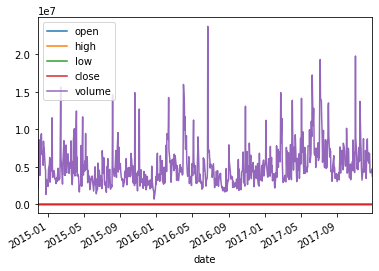

In [47]:
import matplotlib.pyplot as plt

df.plot()
plt.show()

In [48]:
from iexfinance.stocks import Stock

aapl = Stock("AAPL", token=IEX_TOKEN)
aapl
# aapl.get_balance_sheet()

In [132]:
from iexfinance.altdata import get_social_sentiment
get_social_sentiment("AAPL")

{'sentiment': -0.005071511627906976,
 'totalScores': 172,
 'positive': 0.73,
 'negative': 0.27}